In [5]:
# IMPORTING ALL THE REQUIRED INSTALLED MODULES REQUIRED FOR EXPERIMENT 6
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [6]:
df=pd.read_csv("marketing_analysis.txt", low_memory=False)

In [7]:
df.to_csv('marketing_analysis.csv')

In [7]:
df

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [8]:
# FIXING THE FIRST TWO ROWS TO FIX THE COLUMN HEADER

#SKIPPING THE FIRST TWO ROWS AND THEN READING THE DATA IN FILE, AS THEY ARE OF NO USE
data = pd.read_csv("marketing_analysis.csv",skiprows = 2)

# NOW PRINT THE DATA HEAS
data.head()

,1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,2,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,3,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,4,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,5,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,6,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [ ]:
#DROPPING THE CUSTOMER ID COLUMN AND SPLITTING THE JOBEDU COLUMN FURTHER INTO 2 COLUMNS NAMES AS " JOB AND EDUCATION"
# AFTER THE SPLITTING DROP THE JOBEDU COLUMN ALSO

In [9]:
#DROPPING THE CUSTOMER ID COLUMN 
data.drop('customerid', axis = 1, inplace = True)

#SPLITTING THE JOBEDU COLUMN FURTHER INTO 2 COLUMNS - JOB AND EDUCATION
data['job']= data["jobedu"].apply(lambda x: x.split(",")[0])
data['education']= data["jobedu"].apply(lambda x: x.split(",")[1])

#AFTER SPLITTING DROP JOBEDU AS WE DONT REQUIRE IT NOW
data.drop('jobedu', axis = 1, inplace = True)

# NOW PRINT THE UPDATED COLUMNS
data

,1,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,2,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,3,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,4,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,5,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,6,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45208,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,45209,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,45210,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,45211,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [10]:
# MAKING USE OF isnull() and CHECKING FOR THE NULL VALUES
data.isnull().sum()

1             0
age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [11]:
#DROPPING THE RECORDS WITH NO AGE DATA VALUES IN THE RECORD
data = data[~data.age.isnull()].copy()

In [12]:
#AGAIN CHECKING FOR THE MISSING DATASET VALUES
data.isnull().sum()

1             0
age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [13]:
#FINDING THE MODE OF MONTH DATA
month_mode = data.month.mode()[0]

# FILLING THE MISSING VALUES USING THE MODE VALUE OBTAINED FROM MONTH DATA
data.month.fillna(month_mode, inplace = True)

# CHECKING FOR THE MISSING VALUES IN MONTH DATA COLUMN
data.month.isnull().sum()

0

In [14]:
data.isnull().sum()

1             0
age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [12]:
# DROPPING THE RECORDS WITH NO RESPONSE DATA
data = data[~data.response.isnull()].copy()

# CHECKING FOR MISSING VALUES IN EACH COLUMN OF DATA FRAME
data.isnull().sum()

1             0
age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
job           0
education     0
dtype: int64

In [14]:
# BY MAKING USE OF BAR PLOTS, ANALYSING THE JOB CATEGORY.

# PERFORMING CATEGORICAL UNORDERED UNIVARIATE ANALYIS

# CALCULATING THE PERCENTAGE OF EACH JOB STATUS CATEGORY
data.job.value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

In [15]:
# SETTING SEABORN THEME AS WHITE, AS I AM USING DARK THEME ON JUPYTER SO IT WILL 
#BE EASY TO RECOGNIZE WHITE TEXT ON DARK BACKGROUND
sns.set(style="white")

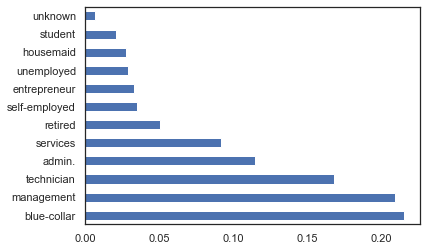

In [16]:
# PLOTTING BAR GRAPHS OF PERCENTAGE JOB CATEGORIES
data.job.value_counts(normalize=True).plot.barh()
plt.show()

In [17]:
# PERFORMING CATEGORICAL ORDERED UNIVARIATE ANALYSIS
#FOR THE FOLLOWING DOMAINS
# MONTHS - JAN, FEB, MARCH, ....
# EDUCATION - PRIMARY, SECONDARY ....

# NOW FROM THE DATASET ---> ANALYSING THE EDUCATION VARIABLE

# AND PLOTTING A PIE CHART FOR THE SAME AND CALCULATING THE PERCENTAGE OF EACH EDUCATION CATEGORY
data.education.value_counts(normalize=True)


secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

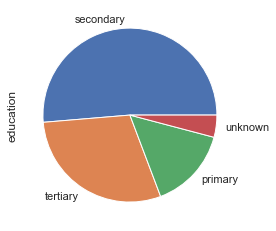

In [18]:
# AND PLOTTING A PIE CHART FOR THE SAME AND CALCULATING THE PERCENTAGE OF EACH EDUCATION CATEGORY
data.education.value_counts(normalize=True).plot.pie()
plt.show()

In [ ]:
# FROM THE PIE CHART ANALYSIS, IT IS CLEARLY VISIBLE THAT THE MAJOR PERCENTAGE BELONG TO THE SECONDARY EDUCATION
# FOLLOWED BY TERTIARY AND PRIMARY
# AND A SMALL PERCENTAGE BELONGS TO THE UNKNOWN CATEGORY

In [19]:
data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

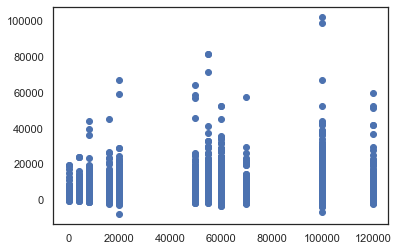

In [23]:
# TAKING THREE COLUMNS BALANCE, AGE AND SALARY FROM OUR UPLOADED DATA SET AND 
# ANALYSIS THE THREE BY PLOTTING SCATTER PLOTS BETWEEN THESE 3 CATEGORIES

# ----> AT FIRST -- PLOTTING THE SCATTER PLOT BETWEEN BALANCE AND SALARY VARIABLE
plt.scatter(data.salary,data.balance)
plt.show()

In [26]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


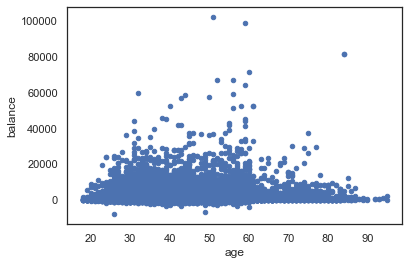

In [20]:
# ----> IN SECOND STEP -- PLOTTING THE SCATTER PLOT BETWEEN BALANCE AND AGE VARIABLE

data.plot.scatter(x="age",y="balance")
plt.show()

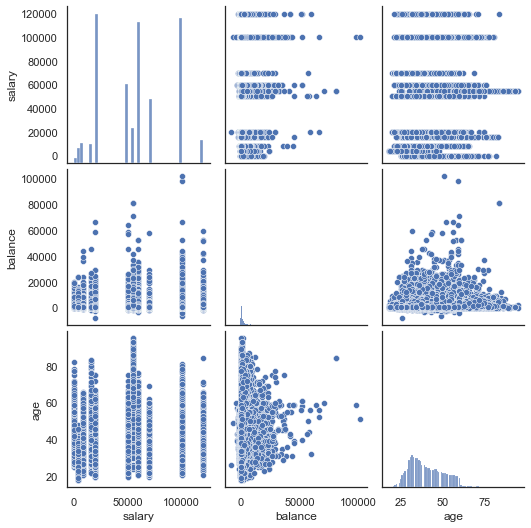

In [21]:
# USING SEABORN LIBRARY PAIR PLOTTING THE SALARY, BALANCE AND AGE IN DATAFRAME
sns.pairplot(data = data, vars=['salary','balance','age'])
plt.show()

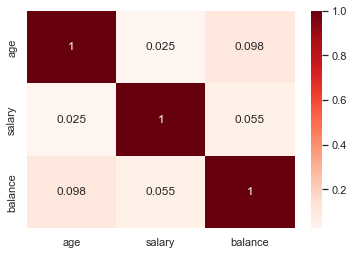

In [22]:
# MAKING USE OF CORRELATION MATRIX FOR ANALYSING 3 VARIABLE IN X AND Y AXIS OF SCATTER AND PAIR PLOTS

# CREATING MATRIX WITH AGE, SALARY AND BALANCE AS ROWS AND COLUMNS
data[['age','salary','balance']].corr()

# PLOTTING THE CORRELATION MATRIX NOW
sns.heatmap(data[['age','salary','balance']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [23]:
# NOW PERFORIMG THE NUMERIC CATEGORICAL ANALYSIS BY MEANS OF MEAN, MEDIAN OR BOX PLOTS

# MAKING USE OF MEAN IN MY CASE TO FIND MEAN OF SALARY AND GROUPING THE RESPONSE WITH NO AND YES SEPARATELY BY USING ,groupby() 
data.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [24]:
# MAKING USE OF MEDIAN NOW TO FIND MEDIAN OF SALARY AND GROUPING THE RESPONSE WITH NO AND YES SEPARATELY BY USING ,groupby() 
data.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

In [ ]:
# WE CAN SEE THE MEAN AND MEDIAN VALUES OF YES AND NO REPOSNE REMAINS SAME (APPROX)
# NOW CHECKING THE VALUES USING BOX PLOT ALSO

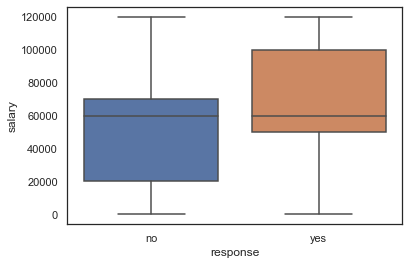

In [25]:
# BOX PLOT OF SALARY FOR YES AND NO REPONSES and
# DEFINING THAT PLOT RESPONSES ON X AXIS AND SALARY ON Y
sns.boxplot(x=data.response, y=data.salary)
plt.show()

In [ ]:
# AN SEE THE ANALYSIS OF BOX PLOT IS DIFFERENT AS COMPARED TO MEAN AND MEDIAN VALUE
# SO HERE PLOTTING BOX PLOT WAS THE BEST OPTION FOR THE NUMERIC CATEGORICAL ANALYSIS
# THE BOX PLOT GAVE THE PRECISE ANALYSIS IF THE RESPONSES

In [26]:
# NOW PERFORMING THE CATEGORICAL ANALYSIS
# TO CHECK THE RELATION BETWEEN DIFFERENT CATEGORIES LIKE EDUCATION, MARITAL STATUS ...  WITH THE RESPONSE COLUMN
# THIS TIME FOR RESPONSE RATE I AM CONVERTING YES AND NO INTO O's and 1's
# FOR YES = 1 AND FOR NO = 0
data['response_rate'] = np.where(data.response=='yes',1,0)
data.response_rate.value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64

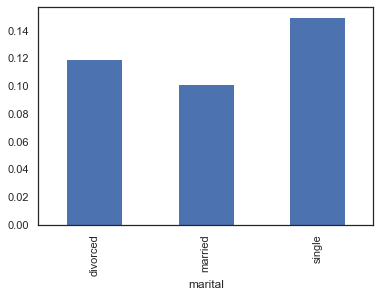

In [27]:
# PLOTTING THE BAR GRAPH OF MARITAL STATUS WITH AVG. VALUE OF RESPONSE RATE
# I.E WHETHER MARRIED, SINGLE OR DIVORCED
data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

In [ ]:
# THE MAXIMIUM RESPONSES CAME OUT TO BE SINGLE FOLLOWED BY DIVORCED THEN MARRIED

In [28]:
# FINALLY PERFORMING THE LAST ANALYSIS - I.E MULTIVARIATE ANALYSIS - I.E TAKING MORE THAN TWO VARIABLE AND COLUMNS FOR ANALYSIS
# USING MULTIVARIATE ANALYSIS - ANALYSING EDUCATION , MARITAL STAUS AND RESPONSE RATE WITH EACH OTHER
# AND CREATING THE PIVOT TABLE WITH 3 COLUMNS FOR THE SAME
result = pd.pivot_table(data=data, index='education', columns='marital',values='response_rate')
print(result)

marital    divorced   married    single
education                              
primary    0.138852  0.075601  0.106808
secondary  0.103559  0.094650  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879


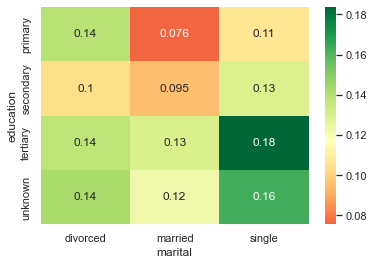

In [29]:
# NOW CREATING A HEAT MAP AMONG THESE 3 VARIABLES
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

In [ ]:
# AFTER ANALYSING THE OBTAINED HEAT MAP, I NOTICED SOME RESULTS HERE
# ---> 1st - MARRIED PEOPLE WITH PRIMARY EDUCTAION - ARE LESS LIKELY FOR RESPONSING POSITIVELY TO THE SURVEY
# ---> 2nd - SINGLE PEOPLE WITH TERIATY EDUCTAION - ARE MORE LIKELY FOR RESPONSING POSITIVELY TO THE SURVEY

In [30]:
print("+++++++++++++++++++++ THANKYOU ++++++++++++++++++++++++")
print('''\t Prabal Manhas
      \t\t 20BCS4513
      \t\t\t Experiment - 6''')

+++++++++++++++++++++ THANKYOU ++++++++++++++++++++++++
	 Prabal Manhas
      		 20BCS4513
      			 Experiment - 6
